### Introduction to regression with neural networks in Tensorflow
There are many definitions for a regression problem
but in our case, we're going to simplify it: predicting a Numerical variable
based on some combination of variables, even shorter...predicting a number.


In [2]:
# Import TensorFlow
import tensorflow as tf
from
print(tf.__version__)

Init Plugin
2.5.0
Init Graph Optimizer
Init Kernel


### Create data to view and fit

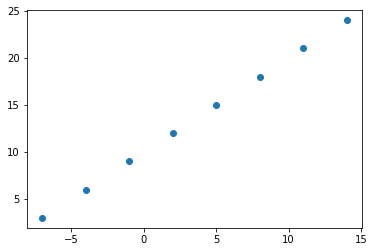

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it with a plotb
plt.scatter(X, y)

In [4]:
# This is the relationship between our independant variable and dependant variable.
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes important 

In [5]:
# Create a demo tensor for our Housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

Metal device set to: Apple M1


2022-07-22 19:03:44.172604: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-22 19:03:44.172757: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
X[1], y[1]

(-4.0, 6.0)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [9]:
X[0], y[0]

(-7.0, 3.0)

In [10]:
# Change the dtype to tf.float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

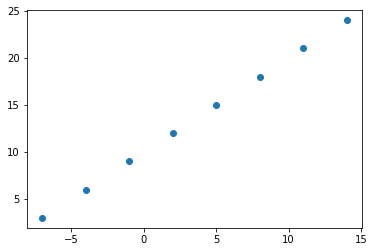

In [12]:
plt.scatter(X, y)

### Steps in modeling with TensorFlow
1. ***Creating a model*** and the find the input and output layers, as well as the hidden layers of
    a deep learning model.
2. Compiling a model - define the loss function (in other words, the function 
    which tells our model how wrong it is) and the optimizer (tells are model how to improve 
    the patterns it's learning) and  evaluation metrics (What we can use to interpret 
    the Performance of our model.)
3. Fitting a model – leading the model try to find patterns between X & y (features and labels)

In [22]:
# Set random seed
tf.random.set_seed(42)

# First Neural model

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sdg is short for stochasitc gradient descent 
              metrics=["mae"])
# 3. Fit the model, epochs is the number of times it goes through the data
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 127ms/step - loss: 16.4449 - mae: 16.4449
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 16.1637 - mae: 16.1637
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 15.8824 - mae: 15.8824
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 15.6012 - mae: 15.6012
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 15.3199 - mae: 15.3199


2022-07-22 19:06:51.240021: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [14]:
# Check out X and y
X, y


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
# Try and make a prediction using our model
model.predict([17.0])

2022-07-22 19:03:45.400109: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[-7.4645805]], dtype=float32)

In [16]:
y_pred = model.predict([17.0])
y_pred

array([[-7.4645805]], dtype=float32)

In [17]:
y_pred + 11

array([[3.5354195]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, 
increase the number of hidden units (all called neurons) within each of the hidden layers, 
change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps the learning rate of the optimization function.
3. **Fitting a model** - here we might fit a model with more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [39]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SDG(), # sdg is short for stochasitc gradient descent 
              metrics=["mae"])

# 3 Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 150ms/step - loss: 13.3657 - mae: 13.3657
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 13.3653 - mae: 13.3653
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 13.3648 - mae: 13.3648
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 13.3644 - mae: 13.3644
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 13.3639 - mae: 13.3639
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 13.3635 - mae: 13.3635
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 13.3630 - mae: 13.3630
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 13.3626 - mae: 13.3626
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 13.3621 - mae: 13.3621
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 13.3617 - mae: 13.3617
Epoch 11/100
1/1 [==============================] - 0s 4

2022-07-22 19:29:23.826014: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 27/100
1/1 [==============================] - 0s 4ms/step - loss: 13.3540 - mae: 13.3540
Epoch 28/100
1/1 [==============================] - 0s 5ms/step - loss: 13.3536 - mae: 13.3536
Epoch 29/100
1/1 [==============================] - 0s 5ms/step - loss: 13.3531 - mae: 13.3531
Epoch 30/100
1/1 [==============================] - 0s 4ms/step - loss: 13.3527 - mae: 13.3527
Epoch 31/100
1/1 [==============================] - 0s 4ms/step - loss: 13.3522 - mae: 13.3522
Epoch 32/100
1/1 [==============================] - 0s 4ms/step - loss: 13.3518 - mae: 13.3518
Epoch 33/100
1/1 [==============================] - 0s 4ms/step - loss: 13.3513 - mae: 13.3513
Epoch 34/100
1/1 [==============================] - 0s 4ms/step - loss: 13.3509 - mae: 13.3509
Epoch 35/100
1/1 [==============================] - 0s 4ms/step - loss: 13.3504 - mae: 13.3504
Epoch 36/100
1/1 [==============================] - 0s 4ms/step - loss: 13.3500 - mae: 13.3500
Epoch 37/100
1/1 [==============================] 

In [24]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [25]:
# Let's see if our model's prediction has improved
model.predict([17.0])


2022-07-22 19:11:52.620096: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[29.956575]], dtype=float32)

In [87]:
# Practice creating a model, homework if you will

# 1. Create the model, the "Dense" number is the number of hidden units e.g. Dense(100)
model = tf.keras.Sequential([
        tf.keras.layers.Dense(50, activation=None),
        tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
             optimizer=tf.keras.optimizers.Adam(lr=0.01),
             metrics=["mae"])
# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 195ms/step - loss: 12.7827 - mae: 12.7827
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 12.0546 - mae: 12.0546
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 11.3208 - mae: 11.3208
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5795 - mae: 10.5795
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 9.8280 - mae: 9.8280
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 9.0641 - mae: 9.0641
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 8.2855 - mae: 8.2855
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 7.4895 - mae: 7.4895
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 6.8615 - mae: 6.8615
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 6.9553 - mae: 6.9553
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - los

2022-07-22 20:13:42.039644: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 23/100
1/1 [==============================] - 0s 4ms/step - loss: 6.1946 - mae: 6.1946
Epoch 24/100
1/1 [==============================] - 0s 5ms/step - loss: 6.0556 - mae: 6.0556
Epoch 25/100
1/1 [==============================] - 0s 4ms/step - loss: 5.8310 - mae: 5.8310
Epoch 26/100
1/1 [==============================] - 0s 4ms/step - loss: 5.6831 - mae: 5.6831
Epoch 27/100
1/1 [==============================] - 0s 5ms/step - loss: 5.5797 - mae: 5.5797
Epoch 28/100
1/1 [==============================] - 0s 4ms/step - loss: 5.5011 - mae: 5.5011
Epoch 29/100
1/1 [==============================] - 0s 4ms/step - loss: 5.4944 - mae: 5.4944
Epoch 30/100
1/1 [==============================] - 0s 5ms/step - loss: 5.4382 - mae: 5.4382
Epoch 31/100
1/1 [==============================] - 0s 4ms/step - loss: 5.3370 - mae: 5.3370
Epoch 32/100
1/1 [==============================] - 0s 4ms/step - loss: 5.1945 - mae: 5.1945
Epoch 33/100
1/1 [==============================] - 0s 5ms/step - loss

In [78]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [88]:
model.predict([17])

2022-07-22 20:13:49.772461: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[27.54979]], dtype=float32)

### Evaluating a model
In practice, a typical workflow you'll go through when building neural network is:
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ->
tweak a model -> fit it -> evaluate it

In [ ]:
# When it come to evaluation there are 3 words to remember:
# Visualize, Visualize, Visualize
# It's good to visualize the data what data are we working with what does it look like
# Visualize the model itself - what does our model look like?
# the training of the model - how does a model perform while it learns?
# The predictions of a model – how does the predictions of a model lineup against,
# the ground truth (the original labels).

In [89]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [90]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

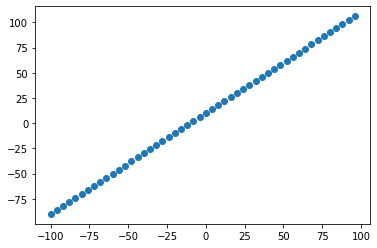

In [91]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets...
* Training set - the model learns from this data, which is typically 70-80% of the total data you have available, 

* Validation set - the model gets tuned on this data, which is typically 10-15% od the data available

* Test set - the model get evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available